
**Sobre**  
Este notebook utiliza um [conjunto de dados](https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression) retirado do kaggle. Ele contém dados de determinada construção, com informações sobre o tipo de construção, metragem quadrada, número de ocupantes, aparelhos usados, temperatura média e o dia da semana.

**Variáveis**  
- **Building Type (Tipo de Edifício):** Variável categórica que representa o tipo de edifício;
- **Square Footage (Metragem Quadrada):** Variável numérica que representa a área total do edifício em metros quadrados;
- **Number of Occupants (Número de Ocupantes):** Variável numérica que indica o número de pessoas que ocupam o edifício;
- **Appliances Used (Aparelhos Utilizados):** Variável numérica que representa a quantidade de aparelhos usados no edifício;
- **Average Temperature (Temperatura Média):** Variável numérica que indica a temperatura média do edifício ou da área climática (em Celsius);
- **Day of Week (Dia da Semana):** Variável categórica que representa se o ponto de dados corresponde a um dia útil ou final de semana;
- **Energy Consumption (Consumo de Energia):** Variável numérica que representa o consumo de energia do edifício em kWh (quilowatt-hora).

# PREPARAÇÃO, ORGANIZAÇÃO E ESTRUTURAÇÃO DOS DADOS
Inicialmente, podemos verificar o conjunto de dados.

In [1]:
# Data analysis and manipulation
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data_analytics/energy_consumption/train_energy_data.csv')

df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


Após isso, podemos conhecer mehor o dataset, observando a quantidade de variáveis e registros.

In [3]:
df.shape

(1000, 7)

O conjunto de dados possui 1000 registros e 7 variáveis.

1\) Otimização

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


O dataframe ocupa ~54.8KB de memória apenas, ainda assim, vamos otimizá-lo, por questões de boas práticas.

In [5]:
# selecting numeric columns by type
cols_float = df.select_dtypes(include='float64').columns
cols_int = df.select_dtypes(include='int64').columns

In [6]:
# applying downcast to float and int columns
df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float')
df[cols_int] = df[cols_int].apply(pd.to_numeric, downcast='integer')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int32  
 2   Number of Occupants  1000 non-null   int8   
 3   Appliances Used      1000 non-null   int8   
 4   Average Temperature  1000 non-null   float32
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float32
dtypes: float32(2), int32(1), int8(2), object(2)
memory usage: 29.4+ KB


O espaço foi reduzido em ~25.4KB.

2\) Valores Nulos  
É importante verificar valores ausentes.

In [8]:
df.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


É conveniente não haver valores nulos no conjunto de dados.

3\) Ajuste das variáveis  
Observando o dataset, é possível notar que as variáveis estão separadas por "espaço", contudo, por boas práticas, convém que isso não aconteça. Optamos por separar as mesmas por underline.

In [9]:
df2 = df.copy()

In [10]:
# replacing spaces with underscores in column names
df2.columns = df2.columns.str.replace(' ', '_')

df2.head()

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,Residential,7063,76,10,29.840000,Weekday,2713.949951
1,Commercial,44372,66,45,16.719999,Weekday,5744.990234
2,Industrial,19255,37,17,14.300000,Weekend,4101.240234
3,Residential,13265,14,41,32.820000,Weekday,3009.139893
4,Commercial,13375,26,18,11.920000,Weekday,3279.169922


# CORRELAÇÃO
Basicamente, mede força, direção e significância estatística do relacionamento entre duas variáveis quantitativas.

## Diretrizes
Alguns critérios precisam ser atendidos para utilizar Correlação Linear de Pearson. Caso os mesmos não sejam atendidos, um teste não-paramétrico deve ser utilizado.

1\) Escala de medida  
As variáveis devem ser medidas em uma escala intervalar ou de razão.

In [11]:
df2.dtypes

,0
Building_Type,object
Square_Footage,int32
Number_of_Occupants,int8
Appliances_Used,int8
Average_Temperature,float32
Day_of_Week,object
Energy_Consumption,float32


As variáveis *Building_Type* e *Day_of_Week* são de escala nominal, portanto, imcompatíveis correlação linear.

In [12]:
df3 = df2.copy().drop(columns=['Building_Type', 'Day_of_Week'], axis=1)

2\) Independência funcional  
É necessário que determinada variável não seja calculada diretamente a partir de outra. Conhecendo a natureza dos dados, concluimos que as variáveis são independentes.

3\) Relação entre as variáveis  
As variáveis devem possuir relação linear.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [14]:
# setting a light background theme
sns.set_theme(style='whitegrid')

In [15]:
plt.rcParams.update({
    'text.color': 'gray',             # text color
    'axes.labelcolor': 'gray',        # axis label color
    'axes.edgecolor': 'gray',         # axis border color
    'xtick.color': 'gray',            # x-axis tick color
    'ytick.color': 'gray',            # y-axis tick color
    'axes.titlecolor': 'gray',        # axis title color
    'axes.edgecolor': 'lightgray',    # axis border color
    'axes.facecolor': 'white',        # axis background color
    'figure.facecolor': 'white',      # figure background color
    'figure.edgecolor': 'white',
    })

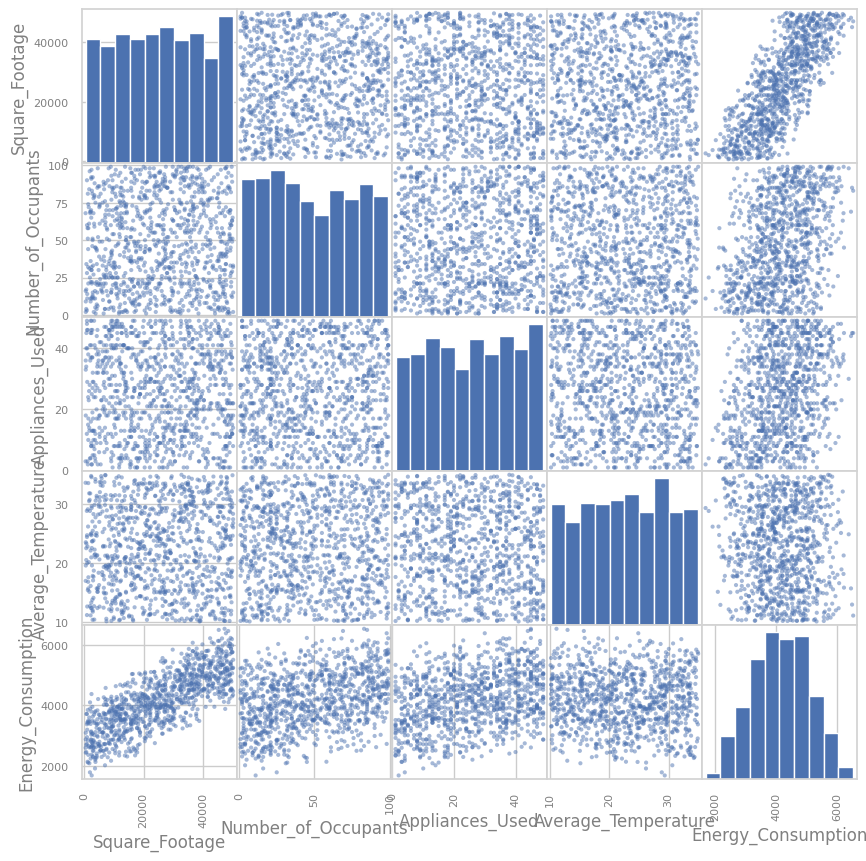

In [16]:
scatter_matrix(df3, figsize=(10, 10));

As variáveis que aparentam ter relacionamento linear são principalmente Energy_Consumption x Square_Footage e Energy_Consumption x Number_of_Occupants. Não obstante, optamos por manter todas.

4\) Normalidade  
As distribuições das variáveis devem ser normais.

**QQ-PLOT**  
Se os pontos se alinharem aproximadamente ao longo da linha reta no gráfico, a variável pode ser considerada normalmente distribuída.

In [17]:
import matplotlib.pyplot as plt
from scipy import stats


def qq_subplots(df):
    # determine the number of rows
    nrows = (len(df.columns) + 1) // 2 # round up for odd numbers

    # create the subplots
    fig, ax = plt.subplots(nrows, 2, figsize=(12, nrows * 4))

    # flatten the axes for easy iteration
    ax = ax.flatten()

    # QQ-plot graphs
    for i, column in enumerate(df.columns):
        stats.probplot(df[column], dist="norm", plot=ax[i])
        ax[i].set_title(f"QQ-plot de {column}")

    # remove possible "empty" subplots
    for j in range(len(df.columns), len(ax)):
        fig.delaxes(ax[j])

    return plt.tight_layout()

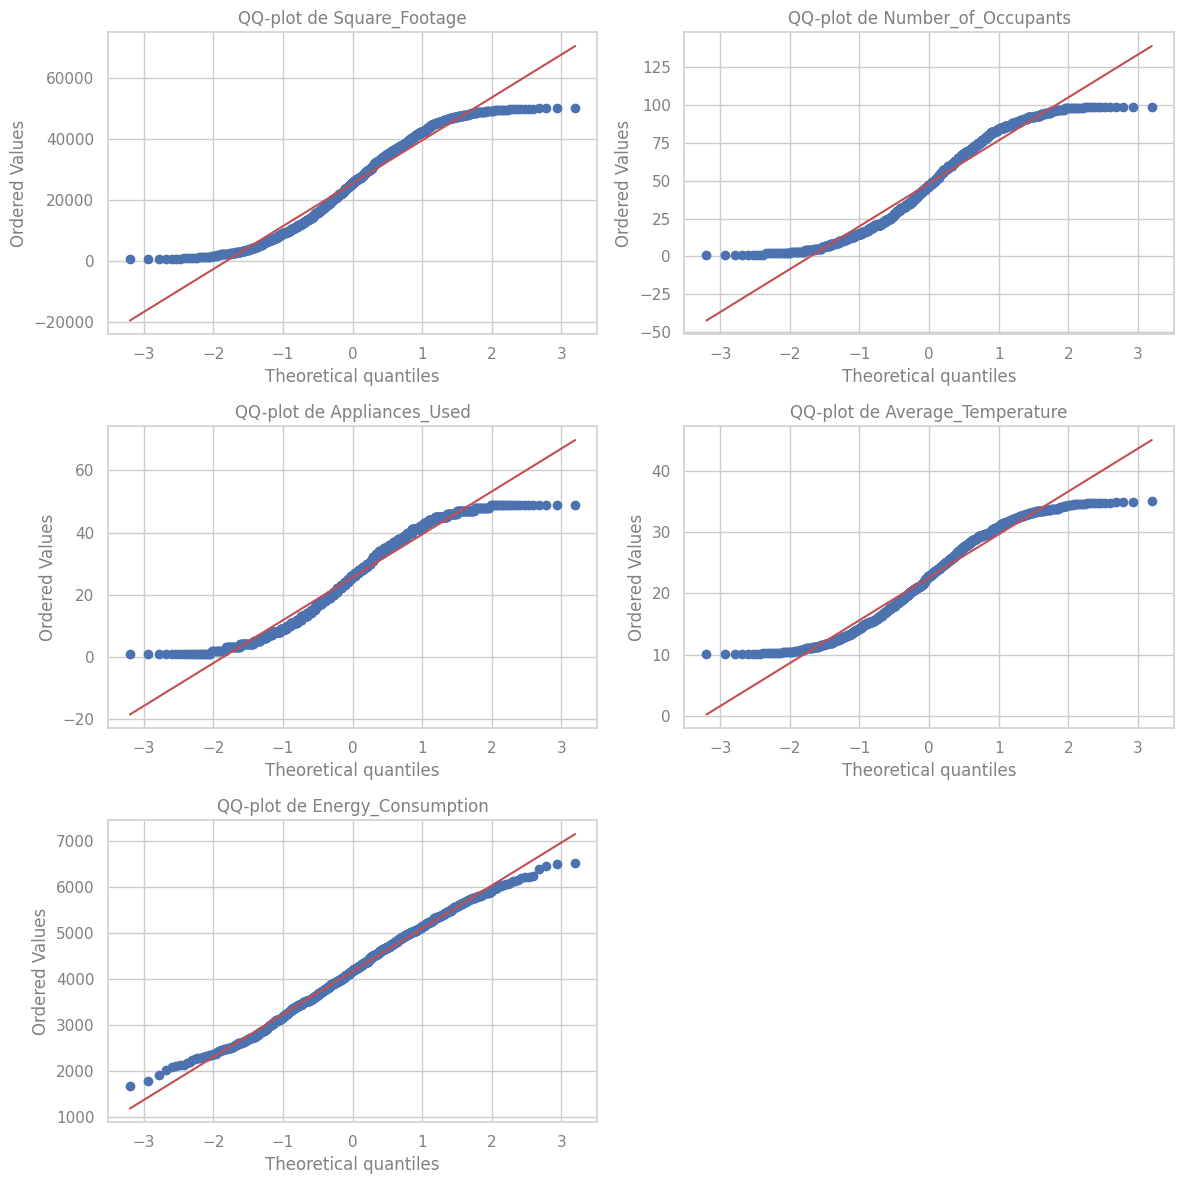

In [18]:
qq_subplots(df3)

A maioria das distribuições apresentou acentuado desvio em suas distribuições, principalmente nas caudas das mesmas, com exceção de Energy_Consumption, que aparentemente demonstrou normalidade. Não obstante, testes numéricos podem elucidar os resultados.

**TESTES NUMÉRICOS**  
Critério:
- **Nível de significância (α)**: 0.05;

Hipóteses:
- **H<sub>0</sub>**: A variável segue uma distribuição normal;
- **H<sub>1</sub>**: A variável não segue uma distribuição normal.

In [ ]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

In [19]:
def normality_tests(df, cols=None):
    if isinstance(cols, str):
        cols = [cols]
    elif cols == None:
        cols = df.columns

    results = []

    # multiple numerical normality tests
    for col in cols:
        shapiro = stats.shapiro(df[col])[1]
        lillie = lilliefors(df[col], dist="norm")[1]
        jarque = stats.jarque_bera(df[col])[1]
        anderson = stats.anderson(df[col], dist="norm")[1][2] # alpha = 0.05

        results.append({"SHAPIRO": shapiro, "LILLIEFORS": lillie,
                        "JARQUE": jarque, "ANDERSON": anderson})

    # returns the p-value of the variables
    return pd.DataFrame(results, index=cols)

In [20]:
normality_tests(df3)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
Square_Footage,1.143421e-16,0.001000,3.118495e-13,0.784
Number_of_Occupants,3.536188e-18,0.001000,5.764633e-15,0.784
Appliances_Used,3.625242e-17,0.001000,9.860950e-14,0.784
Average_Temperature,1.227183e-16,0.001000,2.148625e-13,0.784
Energy_Consumption,2.400245e-04,0.053051,7.879578e-04,0.784


Apenas Energy_Consumption passou em pelo menos dois testes de normalidade. Dessa forma, optamos por utilizar o teste não-paramétrico de Spearman para verificar correlação entre as variáveis.

## Rho de Spearman
Mede força, direção e significância do relacionamento entre duas variáveis quantitativas.

1\) Força e Direção  
A força da correlação indica quão fortemente duas variáveis estão relacionadas, já a direção, se a relação entre as mesmas é ascendente ou descendente.

| COEFICIENTE | GRAU |
- | -
| r = ±1 | Perfeita |
| ±0,8 ≤ r < ±1 | Muito forte |
| ±0,6 ≤ r <± 0,8 | Forte |
| ±0,4 ≤ r < ±0,6 | Moderada |
| ±0,2 ≤ r < ±0,4 | Fraca |
| 0 < r < ±0,2 | Muito fraca |
| r = 0 | Sem correlação |

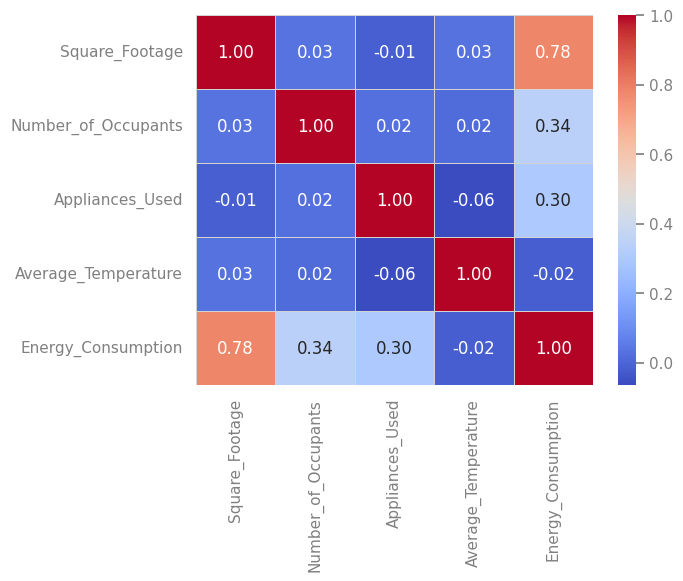

In [21]:
sns.heatmap(df3.corr(method='spearman'), annot=True, linecolor='lightgrey',
            fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5);

As correlações de maior força foram entre *Energy_Consumption* x *Square_Footage*, Energy_Consumption x *Number_of_Occupantes* e Energy_Consumption x *Appliances_Useed*, com correlações positivas de forte a fracas. Não obstante, vamos verificar se as referidas relações são devidas ao acaso.

2\) Significância Estatística  
Testes estatísticos devem ser utilizados para verificar se a correlação observada é estatisticamente significativa.

Critérios:
- **Nível de significância (α):** 0,05.

Hipóteses:
- **H<sub>0</sub>:** Não há correlação significativa entre as variáveis;
- **H<sub>1</sub>:** Há correlação significativa entre as variáveis.

In [22]:
features = df3.copy()[['Square_Footage', 'Number_of_Occupants',
                       'Appliances_Used', 'Energy_Consumption']].columns

In [23]:
p_values = []

for i in features:
    if i != 'Energy_Consumption':
        estat, p_value = stats.spearmanr(df3['Energy_Consumption'], df3[i])
        p_values.append(p_value)

pd.DataFrame({'p-valur': p_values}, index=features[:3])

,p-valur
Square_Footage,8.776578e-207
Number_of_Occupants,6.010203e-29
Appliances_Used,6.412792e-22


De acordo com os resultados, vemos que as correlações supracitadas são estatisticamente significativas, isso indica que as mesmas não são devidas ao acaso. Dessa forma, podemos concluir que a área total da construção (Square_Footage), a quantidade de ocupantes (Number_of_Occupants) e o número de aparelhos utilizados (Appliances_Used) são estatísticamente relacionados ao consumo de energia (Energy_Consumption).

# REGRESSÃO LINEAR MÚLTIPLA
Método estatístico que busca estabelecer uma relação linear entre uma ou mais variáveis independentes e uma variável dependente.

## Projeto
O consumo de energia elétrica tem se tornado uma preocupação crescente em meio à busca por sustentabilidade e eficiência energética. No cenário atual, onde políticas públicas e iniciativas privadas estão voltadas para a redução do impacto ambiental e a otimização do uso de recursos, compreender fatores que influenciam o consumo energético é essencial.

1\. Justificativa  
Tendo em vista os resultados do estudo de correlação, conhecemos a necessidade de identificar os determinantes do consumo de energia em edificações e, com isso, subsidiar estratégias de gerenciamento mais eficazes.

2\. Variáveis  
A escolha das variáveis independentes — Square_Footage (área construída), Number_of_Occupants (número de ocupantes) e Appliances_Used(aparelhos utilizados) — se baseia na relevância prática e potêncial influência desses fatores, apontada pelo estudo de correlação de Pearson. Além disso, será aplicado o processo de Dummy Encoding sobre a variável Building\_Type, buscando estabelecer a relação do tipo de construção com o consumo de energia.

3\. Objetivo  
Com o desenvolvimento deste modelo, busca-se alcançar três objetivos principais:
- Determinar o peso da área construída, do número de ocupantes e do tipo de construção no consumo de energia;
- Identificar quais fatores têm maior influência no consumo;
- Garantir a precisão das previsões por meio de métricas robustas de desempenho;
- Realizar previsões confiáveis sobre o consumo de energia elétrica, explorando relações não lineares entre variáveis.

4\. Metodologia  
O Random Forest Regressor foi escolhido por sua capacidade em modelar relações complexas entre variáveis e robustez frente a outliers e variáveis irrelevantes. Ele funciona como um conjunto de árvores de decisão, gerando previsões através da média das predições de múltiplas árvores. Isso melhora a generalização do modelo e reduz o risco de sobreajuste.

### Dummy encoding

In [24]:
df4 = pd.get_dummies(df2, columns=['Building_Type'], drop_first=True)

In [25]:
df4.drop(columns=['Average_Temperature', 'Day_of_Week'],
         inplace=True)

In [26]:
df4['Building_Type_Industrial'] = df4.Building_Type_Industrial.astype('int8')
df4['Building_Type_Residential'] = df4.Building_Type_Residential.astype('int8')

In [27]:
# change to improve readability
df4.rename(columns={'Building_Type_Industrial': 'Is_Industrial',
                    'Building_Type_Residential': 'Is_Residential'},
           inplace=True)

### Multicoliearidade  
Embora o Random Forest não seja diretamente afetado pela multicolinearidade em termos de desempenho preditivo, ela pode ter algumas implicações práticas:
- Importância das variáveis: pode distorcer as métricas de importância das variáveis;
- Interpretação: é difícil determinar qual variável dentro de um grupo correlacionado é a verdadeira responsável pelo impacto no modelo.

Critérios:
- **VIF < 5:** Baixa multicolinearidade;
- **5 ≤ VIF < 10:** Multicolinearidade moderada;
- **VIF ≥ 10:** Alta multicolinearidade (recomenda-se considerar a remoção ou combinação de variáveis).

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [30]:
X = df4.copy().drop(columns=['Energy_Consumption'], axis=1)

In [31]:
# add a constant (or intercept term)
X_train = sm.add_constant(X)

In [32]:
vif = pd.DataFrame()

In [33]:
vif["Variable"] = X.columns
# calculate VIF for each variable
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Variable,VIF
0,Square_Footage,0.007697
1,Number_of_Occupants,3.009165
2,Appliances_Used,3.089001
3,Is_Industrial,1.757436
4,Is_Residential,1.785180


Os resultados estão bem abaixo do limite crítico, o que indica que as variáveis não estão altamente correlacionadas entre si. Além disso, o valor elevado do "const" não é preocupante, pois representa a constante do modelo e não afeta diretamente a avaliação de multicolinearidade.

## Modelo

1\. Seleção das variáveis

In [34]:
y_train = df4.copy()[['Energy_Consumption']].values.ravel()

2\. Criação e ajuste do modelo

In [35]:
# Model creation and fitting
model = sm.OLS(y_train, X_train).fit(cov_type='HC3')

3\. Estimativa dos parâmetros  
Processo de determinar os valores dos coeficientes que definem a equação da linha de melhor ajuste aos dados.
Para estimar os parâmetros α e β, utilizamos a soma dos quadrados dos resíduos.

1) Coeficiente linear (α)  
Representa o valor esperado de _y_ quando todas variáveis preditoras são zero.

In [36]:
model.params[:1]

,0
const,1912.661734



O valor do intercepto não tem relevância interpretativa real para nosso caso.

2\) Coeficiente angular (β)  
Representa a variação média esperada em _y_ para cada unidade incrementada na respectiva variável independente (mantendo as demais constantes).

In [37]:
model.params[1:]

,0
Square_Footage,0.049920
Number_of_Occupants,9.970501
Appliances_Used,20.175320
Is_Industrial,497.257828
Is_Residential,-501.545514


Resultados:  
- **β<sub>1</sub> (Square_Footage):** Cada aumento de 1 unidade na área construída está associado a um aumento de aproximadamente 0,05 unidades no consumo de energia;
- **β<sub>2</sub> (Number_of_Occupants):** Cada pessoa adicional no edifício está associada a um aumento de 9,96 unidades no consumo de energia;
- **β<sub>3</sub> (Appliances_Used):** Para cada equipamento adicional em uso no prédio, espera-se que o consumo de energia aumente em 20,19 unidades, controlando para as outras variáveis;
- **β<sub>4</sub> (Is_Industrial):** Se o edifício for industrial (em comparação com um edifício comercial, que é a categoria de referência), espera-se que o consumo de energia seja 500,32 unidades maior;
- **β<sub>5</sub> (Is_Residential):** Se o edifício for residencial (comparado ao comercial), o consumo de energia será 497,60 unidades menor, também mantendo as demais variáveis constantes.

3\) Fórmula  
Equação da reta de regressão:

$$
\text{Energy_Consumption} = 0.049957 \cdot \text{Square_Footage} + 9.962892 \cdot \text{Number_of_Occupants} + 20.191135 \cdot \text{Appliances_Used} + 500.323169 \cdot \text{Is_Industrial} - 497.602305 \cdot \text{Is_Residential} + \epsilon
$$

## Avaliação
Não basta simplesmente fazer a regressão, é necessário saber se o modelo é eficiente. Isso pode ser medido através dos seguintes itens.

1\. Dados de teste  
Utilizaremos um dataframe não utilizado ainda para testar o treinamento do modelo.

In [38]:
# test data
df_ = pd.read_csv('/content/drive/MyDrive/data_analytics/energy_consumption/test_energy_data.csv')

df_.shape

(100, 7)

In [39]:
df_[cols_float] = df_[cols_float].apply(pd.to_numeric, downcast='float')
df_[cols_int] = df_[cols_int].apply(pd.to_numeric, downcast='integer')

In [40]:
df_.columns = df_.columns.str.replace(' ', '_')

In [41]:
df_test = pd.get_dummies(df_, columns=['Building_Type'], drop_first=True)

In [42]:
df_test.drop(columns=['Average_Temperature', 'Day_of_Week'],
            inplace=True)

In [43]:
df_test['Building_Type_Industrial'] = df_test.Building_Type_Industrial.astype('int8')
df_test['Building_Type_Residential'] = df_test.Building_Type_Residential.astype('int8')

In [44]:
df_test.rename(columns={
    'Building_Type_Industrial': 'Is_Industrial',
    'Building_Type_Residential': 'Is_Residential'
    }, inplace=True)

In [46]:
X_test = df_test.copy().drop(columns=['Energy_Consumption'], axis=1)
y_test = df_test.copy()[['Energy_Consumption']].values.ravel()

In [47]:
X_test = sm.add_constant(X_test)

2\. Valores-p  
Indicam a significância estatística dos coeficientes do modelo, ou seja, se podemos considerar que o efeito observado nas variáveis não é devido ao acaso.

Critério:  
- **Nível de significância (α):** 0.05;

Hipóteses:
- **H<sub>0</sub>:** O coeficiente é zero;
- **H<sub>1</sub>:** O coeficiente é diferente de zero.

1) Coeficiente Linear (β<sub>0</sub>)

In [48]:
model.pvalues[:1]

,0
const,0.0


O intercepto é estatisticamente significativo, indicando que, mesmo sem nenhuma das variáveis independentes (valores zerados), o nível de consumo de energia esperado não é zero.

2) Coeficiente Angular (β<sub>1</sub>)

In [49]:
model.pvalues[1:]

,0
Square_Footage,0.0
Number_of_Occupants,0.0
Appliances_Used,0.0
Is_Industrial,0.0
Is_Residential,0.0



Como todos os p-valores são iguais a 0 (menores que o nível de significância escolhido), podemos afirmar que todas as variáveis no modelo são estatisticamente significativas. Isso significa que as mesmas contribuem de forma relevante para explicar as variações no consumo de energia (Energy_Consumption).

2\. Resíduos  
Diferenças entre os valores observados da variável dependente e os valores previstos pelo modelo. Em outras palavras, eles representam o quanto o modelo está errando em suas previsões.

1\) Independência  
Os resíduos exibirem algum padrão sugere que o modelo pode não capturar corretamente a relação entre as variáveis dependente e independente.

**FUNÇÃO DE AUTOCORRELAÇÃO (ACF)**  
Mede a correlação entre observações de uma série temporal separadas por diferentes lags (intervalos de tempo)

In [50]:
y_test_pred = model.predict(X_test)

In [51]:
residuals = y_test - y_test_pred

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

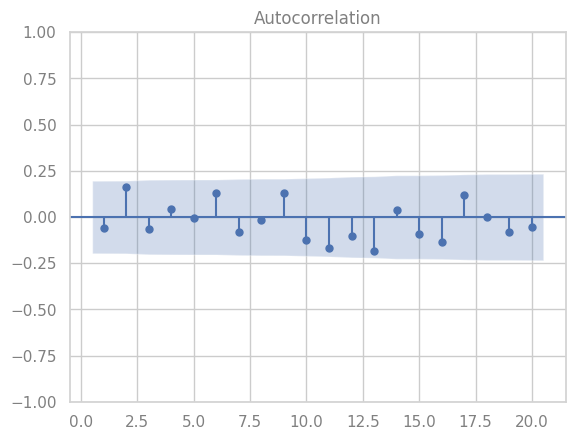

In [53]:
plot_acf(residuals, zero=False);

Todas as autocorrelações parecem estar dentro do intervalo de confiança (área sombreada em azul), isso sugere que os resíduos não apresentam correlação significativa em lags maiores, indicando que não há autocorrelação significativa nos erros do modelo.

**TESTE DE DURBIN-WATSON**  
Detecta a presença de autocorrelação nos resíduos de uma regressão.

Critérios:
- **2:** Não há correlação serial significativa (os resíduos são independentes);
- **< 2:** Correlação positiva entre os resíduos;
- **> 2:** Correlação negativa entre os resíduos;
- **Limite crítico:** 1.5 < resultado < 2.5.

In [54]:
from statsmodels.stats.stattools import durbin_watson

In [55]:
durbin_watson(residuals)

2.11706206802354

O resultado próximo de 2 indica que não há evidências de correlação serial significativa entre os resíduos, e, portanto, eles podem ser considerados independentes.

2\) Normalidade

**QQ-PLOT**

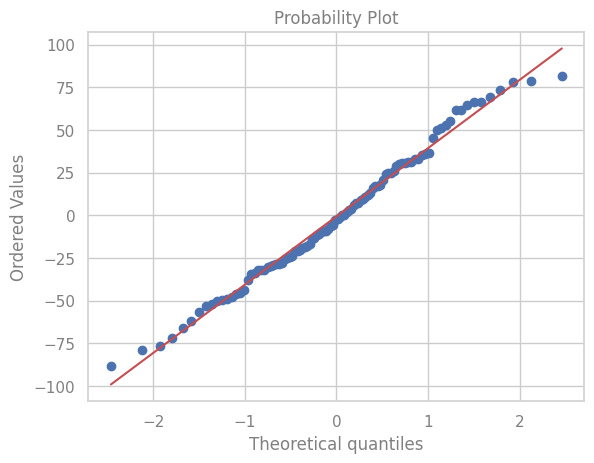

In [56]:
stats.probplot(residuals, dist="norm", plot=plt);


A maior parte dos pontos segue bem a linha reta, indicando que os resíduos se aproximam de uma distribuição normal. Pequenos desvios ocorrem nas extremidades (caudas), sugerindo possível presença de outliers ou leve assimetria.

**TESTES NUMÉRICOS**

Critério:
- **Nível de significância (α)**: 0.05;

Hipóteses:
- **Hipótese Nula (H<sub>0</sub>)**: A variável segue uma distribuição normal;
- **Hipótese Alternativa (H<sub>1</sub>)**: A variável não segue uma distribuição normal.

In [57]:
normality_tests(pd.DataFrame(residuals, columns=['Residuals']))

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
Residuals,0.36823,0.760916,0.426097,0.759


Todos os resultados tiveram valores maior que o nível de significância escolhido. POrtanto, se aceita a hipótese nula de normalidade da distribuição.

3\) Homoscedasticidade  
Suposição de que a variabilidade dos ou erros no modelo de regressão é constante para todos os níveis das variáveis independentes.

**TESTE GRÁFICO**

In [58]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [59]:
lowess_line = lowess(residuals, y_test_pred, frac=0.65)

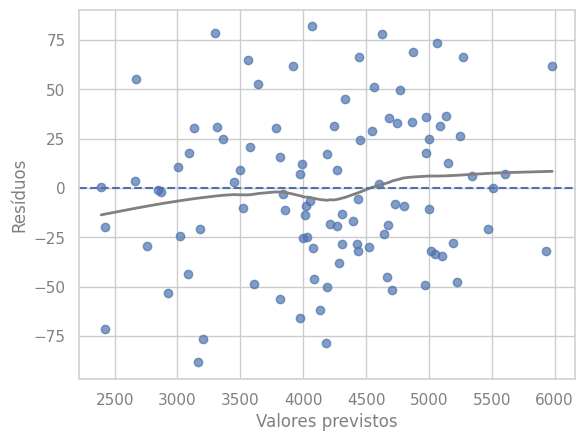

In [60]:
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.plot(lowess_line[:, 0], lowess_line[:, 1], linewidth=2, color='grey')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')
plt.axhline(0, linestyle='--');


Os resíduos estarem relativamente dispersos de forma uniforme em torno de zero e não haver padrão claro de aumento ou diminuição da variância à medida que os valores previstos aumentam são indicativos de homocedasticidade. Não obstante, a linha suavizada apresenta pequenas flutuações, mas sem indicar tendência preocupante de variância desigual.

**TESTES NUMÉRICOS**  
Critério:
- **Nível de significância (α):** 0.05.

Hipóteses:
- **H<sub>0</sub>:** Os resíduos são homocedásticos;
- **H<sub>1</sub>:** Os resíduos são heterocedásticos.

In [61]:
from statsmodels.stats.diagnostic import (
    het_breuschpagan,
    het_white,
    het_goldfeldquandt
    )

In [62]:
dict(zip(['LM statistic', 'LM p-value', 'F-statistic', 'F p-value'],
het_breuschpagan(residuals, X_test)))

{'LM statistic': 5.989285423792912,
 'LM p-value': 0.30726289000829327,
 'F-statistic': 1.1977205627559824,
 'F p-value': 0.31635334680739935}

In [63]:
dict(zip(['LM statistic', 'LM p-value', 'F-statistic', 'F p-value'],
het_white(residuals, X_test)))

{'LM statistic': 16.5082494723249,
 'LM p-value': 0.48813307551129104,
 'F-statistic': 0.9537232883878025,
 'F p-value': 0.5165114918997329}

In [64]:
dict(zip(['F-statistic', 'p-value', 'ordering'],
het_goldfeldquandt(residuals, X_test)))

{'F-statistic': 1.9567772775773975,
 'p-value': 0.014129355542826598,
 'ordering': 'increasing'}

Apesar do resultado do teste de Goldfeld-Quandt indicar heterocedasticidade nos resíduos, o modelo ainda é utilizável, devido a aplicação de erros padrão robustos (HC3). Esse ajuste corrige a inconsistência nas estimativas dos coeficientes e mantém a validade das inferências estatísticas. Além disso, outros testes, como o de White, corroboram que a heterocedasticidade não compromete a funcionalidade geral do modelo. Essa abordagem é aceita em análises estatísticas, sendo recomendada por [White (1980)](https://www-2.rotman.utoronto.ca/~kan/3032/pdf/GeneralizedMethodOfMoments/White_Econometrica_1980.pdf) e, também, [MacKinnon & White (1985)](https://www.econstor.eu/bitstream/10419/189084/1/qed_wp_0537.pdf), especialmente em situações onde a heterocedasticidade não compromete significativamente a qualidade das estimativas dos coeficientes, mas pode afetar as inferências associadas aos testes de significância.

## Previsões

In [65]:
pd.DataFrame({'Real': y_test, 'Predicted': y_test_pred})

,Real,Predicted
0,2865.570068,2867.571232
1,4283.799805,4311.998151
2,5067.830078,5102.303526
3,4624.299805,4669.557827
4,4820.589844,4770.724537
...,...,...
95,3010.810059,3000.158498
96,4248.490234,4267.805577
97,2843.600098,2844.725609
98,3348.389893,3317.450846


1\. Métricas estatísticas  
Faremos comparações entre os dados de treino e teste, onde havendo diferença significativa, é indicativo de over ou underfiting.

1\) Erro Absoluto Médio  
Fornece a média dos erros absolutos entre os valores observados e os previstos.

In [66]:
from sklearn.metrics import (
    mean_absolute_error as mae,
    mean_squared_error as mse,
    r2_score
)
import numpy as np

In [67]:
y_train_pred = model.fittedvalues

In [68]:
mae(y_train, y_train_pred), mae(y_test, y_test_pred)

(35.43922269222627, 32.35784292529375)

A diferença entre os resultados de treino e teste é pequena. Isso sugere que o modelo tem bom desempenho geral e consegue prever os valores de teste com quase a mesma precisão que no treino.

2\) Raiz do Erro Quadrático Médio  
Mede a diferença média entre os valores previstos por um modelo de previsão e os reais.

In [69]:
np.sqrt(mse(y_train, y_train_pred)), np.sqrt(mse(y_test, y_test_pred))

(43.22846400296748, 39.368011035312115)


A pequena diferença entre os valores de RMSE também reforça que o modelo tem desempenho consistente entre os dados de treino e teste. Como o RMSE penaliza mais os erros grandes, essa métrica confirma que o modelo não está cometendo erros extremos.

3\) R-quadrado  
Indica a proporção da variabilidade na variável dependente que é explicada pelas variáveis independentes no modelo de regressão.

In [70]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9978525679411996, 0.9977414962080992)


O R<sup>2</sup> em ambos os conjuntos está acima de 0,99, o que indica que o modelo consegue explicar quase toda a variabilidade dos dados. A diferença mínima entre os dois valores sugere que o modelo não está superajustado (overfitting) nem subajustado (underfitting).

2\. Valor previsto x real  
Pode ser utilizado para comparar diretamente as previsões com os valores observados.

In [71]:
line = [min(y_test), max(y_test)]

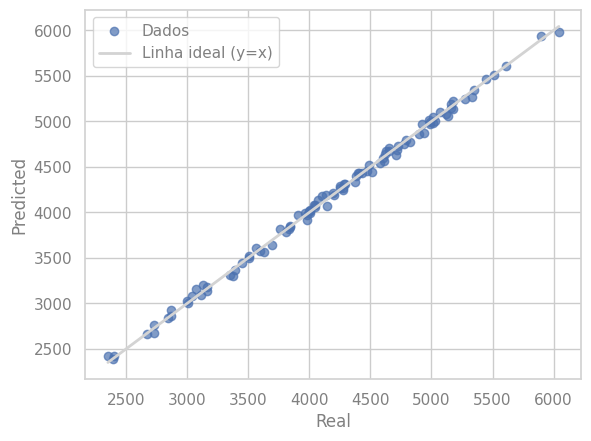

In [72]:
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Dados')
plt.plot(line, line, linewidth=2, color='lightgrey', label="Linha ideal (y=x)") # 45-degree line
plt.legend(loc='best')
plt.xlabel('Real')
plt.ylabel('Predicted');

A maioria dos pontos próxima da linha diagonal indica que as previsões do modelo estão próximas dos valores reais. Além disso, a dispersão mínima dos dados parece consistente ao longo de toda a faixa de valores, sugerindo que o modelo mantém a precisão em diferentes níveis de consumo de energia, sem tendência a sub ou superestimar em faixas específicas.

### Validação cruzada
Avalia a robustez do modelo dividindo os dados em diferentes subconjuntos.

In [73]:
from sklearn.model_selection import KFold

In [74]:
# set the number of folds (K)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [75]:
# list to store the results
r2_scores = []
mae_scores = []
rmse_scores = []

# perform cross-validation
for train_index, test_index in kf.split(X_train):
    # split the data into training and testing
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    # use array indexing instead of .iloc for NumPy arrays
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    # fit the OLS model
    model = sm.OLS(y_train_cv, X_train_cv).fit()

    # make predictions on the test data
    y_test_pred = model.predict(X_test_cv)

    # calculate metrics
    r2_scores.append(model.rsquared)  # R^2
    mae_scores.append(np.mean(np.abs(y_test_cv - y_test_pred)))  # MAE
    rmse_scores.append(np.sqrt(np.mean((y_test_cv - y_test_pred) ** 2)))  # RMSE

1\) Métricas estatísticas

In [76]:
mae_scores.append(np.mean(mae_scores))
rmse_scores.append(np.mean(rmse_scores))
r2_scores.append(np.mean(r2_scores))

In [77]:
pd.DataFrame({
    'MAE': mae_scores,
    'RMSE': rmse_scores,
    'R²': r2_scores
    }, index=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Mean'])

,MAE,RMSE,R²
Fold 1,36.144287,44.366669,0.997909
Fold 2,34.697509,43.092417,0.997913
Fold 3,37.089284,44.306982,0.997815
Fold 4,33.037842,40.748327,0.997771
Fold 5,37.395499,44.764398,0.997863
Mean,35.672884,43.455759,0.997854



Resultados:
1. **MAE:** variou entre 34,57 e 39,28, com uma média de 36,35. Essa variação pequena, indica que o modelo tem desempenho consistente em diferentes folds;
2. **RMSE:** variou entre 41,58 e 46,57, com uma média de 43,87. A consistência dos valores indica que o modelo é estável e não apresenta erros extremos em nenhum fold;
3. **R-quadrado:** variou entre 0,9978 e 0,9981, com uma média de 0,99795. Esse resultado extremamente alto confirma que o modelo explica quase toda a variabilidade dos dados em todos os folds.

2\) Erro Relativo  
A proporção do erro em relação à faixa de valores.

In [78]:
y_test.min(), y_test.max()

(2351.97, 6042.56)

Com isso, vemos que os dados de treino variam entre 2351.97 e 6042.56kWh.

In [79]:
mean_mae = mae_scores[-1]
mean_ytest = y_test.mean()

In [80]:
# Mean relative error
mean_mae / mean_ytest

0.008518738787295664

O resultado significa que, em média, o erro absoluto do modelo representa cerca de 0,85% do valor médio dos dados de _y\_test_. Esse é um erro relativamente baixo e indica um bom ajuste do modelo.

3\) Desvio-padrão Médio  
Representa a variabilidade do desempenho do modelo entre as diferentes dobras (subconjuntos) usadas no processo de validação.

In [81]:
np.std(mae_scores[:-1])

1.6180611590772418

O resultado mostra que a variação dos erros entre as diferentes dobras da validação cruzada é baixa. Isso indica que o modelo é estável e apresenta desempenho consistente em diferentes subconjuntos dos dados.

## Learning Curve
Fornecem uma visão clara sobre o comportamento do modelo em relação ao tamanho do conjunto de treinamento.

In [82]:
# training set sizes to evaluate
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different sizes between 10% and 100% of the training data

In [83]:
# variables to store the metrics
train_mae = []
test_mae = []
train_r2 = []
test_r2 = []

# iterate over different training set sizes
for size in train_sizes:
    # select a subset of the training set
    subset_size = int(len(X_train) * size)
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    # add constant (necessary for OLS)
    X_train_subset = sm.add_constant(X_train_subset)
    X_test_const = sm.add_constant(X_test)

    # fit the OLS model
    model = sm.OLS(y_train_subset, X_train_subset).fit()

    # predict on training and test sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_const)

    # calculate metrics on training data
    train_mae.append(np.mean(np.abs(y_train_subset - y_train_pred)))
    train_r2.append(model.rsquared)

    # calculate metrics on test data
    test_mae.append(np.mean(np.abs(y_test - y_test_pred)))
    test_r2.append(1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

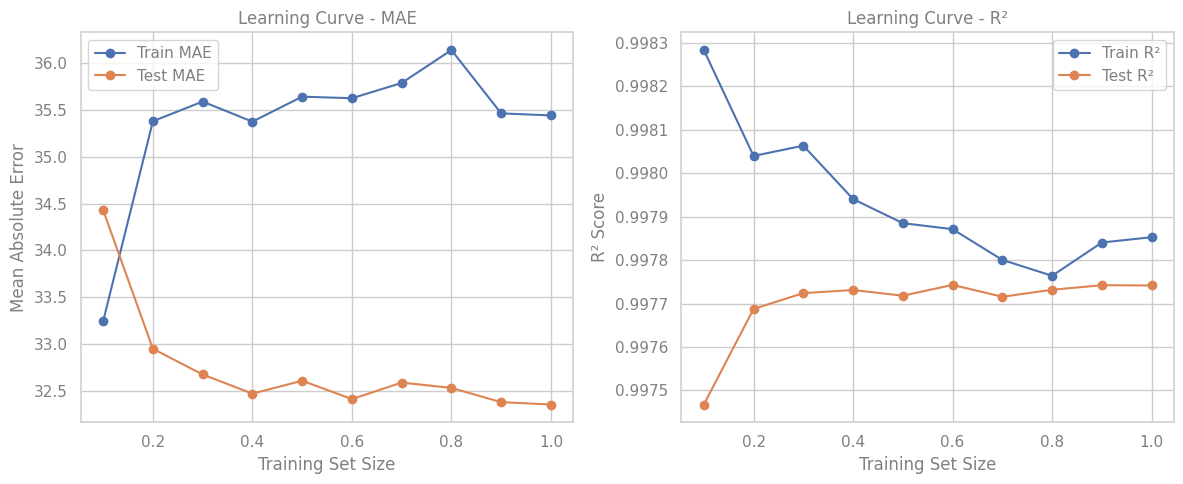

In [84]:
# plot the learning curves
plt.figure(figsize=(12, 5))

# MAE
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mae, label="Train MAE", marker='o')
plt.plot(train_sizes, test_mae, label="Test MAE", marker='o')
plt.title("Learning Curve - MAE")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.legend(loc='best')

# R²
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_r2, label="Train R²", marker='o')
plt.plot(train_sizes, test_r2, label="Test R²", marker='o')
plt.title("Learning Curve - R²")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc='best')

plt.tight_layout();

Interpretação:  
1\) MAE
1. **Treino (linha azul):** A curva de treino apresenta um leve aumento no MAE à medida que o tamanho do conjunto de treino cresce, o que é esperado, pois modelos com mais dados podem ajustar menos os dados de treino;
2. **Teste (linha laranja):** A curva de teste permanece estável após um certo ponto, indicando que o modelo está generalizando bem, sem sinais de overfitting ou underfitting.

2) R<sup>2</sup>  
1. **Treino**: O R<sup>2</sup> de treino diminui levemente com o aumento dos dados, alinhado com a tendência de redução no ajuste aos dados de treino;
2. **Teste:** O R<sup>2</sup> de teste estabiliza em valores altos, mostrando que o modelo mantém um desempenho consistente ao prever novos dados.